In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('madfhantr.csv')
df = data.copy()
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df_OneHot=pd.get_dummies(df,columns=['Gender','Married','Education','Self_Employed','Property_Area'])
df=df_OneHot.copy()

In [4]:
df.head(25)

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,NaN,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
6,LP001013,0,2333,1516.0,95.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
7,LP001014,3+,3036,2504.0,158.0,360.0,0.0,N,0,1,0,1,1,0,1,0,0,1,0
8,LP001018,2,4006,1526.0,168.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1
9,LP001020,1,12841,10968.0,349.0,360.0,1.0,N,0,1,0,1,1,0,1,0,0,1,0


In [5]:
df.isnull().sum()

Loan_ID                     0
Dependents                 15
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [6]:
df = df.fillna(0)

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124,334.201954,0.773616,0.182410,0.796417,0.346906,0.648208,0.781759,0.218241,0.814332,0.133550,0.291531,0.379479,0.328990
std,6109.041673,2926.248369,88.340630,82.183884,0.418832,0.386497,0.402991,0.476373,0.477919,0.413389,0.413389,0.389155,0.340446,0.454838,0.485653,0.470229
min,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,0.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1


In [9]:
df.dtypes

Loan_ID                     object
Dependents                  object
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [10]:
df['Loan_Status'].replace({'N': 0, 'Y': 1}, inplace=True)
df['Dependents'].replace({'3+': 3}, inplace=True)
df['Dependents'].replace({'0': 0}, inplace=True)

In [11]:
df['Loan_Status'].unique()


array([1, 0], dtype=int64)

In [12]:
df['Dependents'].unique()


array([0, 1, 2, 3], dtype=int64)

In [13]:
df.dtypes

Loan_ID                     object
Dependents                   int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [14]:
X = df.drop(['Loan_ID','Loan_Status'], axis=1)
Y = df[['Loan_Status']]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3, random_state=25, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(429, 17) (429, 1)
(185, 17) (185, 1)


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=100)

In [18]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=100)

In [19]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb = clf_dt.predict_proba(xtest)[:, 1]

In [20]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(ytest, dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.6702702702702703


In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(ytest,dt_pred))


              precision    recall  f1-score   support

           0       0.47      0.53      0.50        57
           1       0.78      0.73      0.76       128

    accuracy                           0.67       185
   macro avg       0.62      0.63      0.63       185
weighted avg       0.68      0.67      0.68       185



In [23]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,0.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1,8072,240.0,253.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2,7583,0.0,187.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [24]:
Y['Loan_Status'].unique()

array([1, 0], dtype=int64)

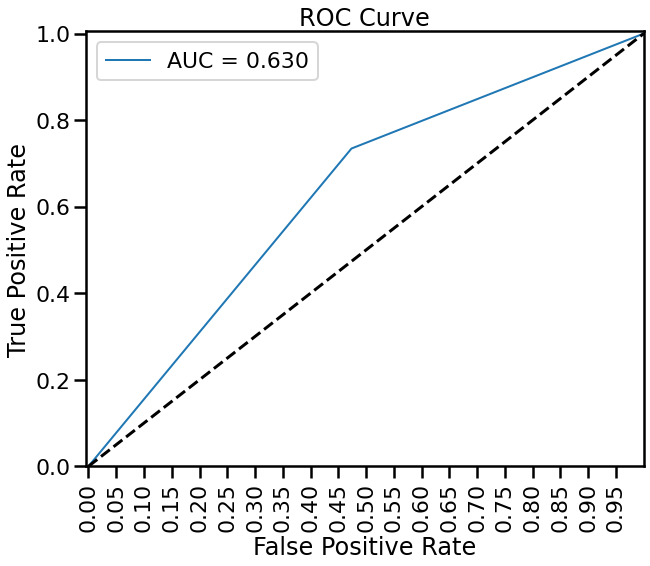

In [25]:
import seaborn as sns
from plot_roc import plot_roc_curve
from sklearn.metrics import auc, roc_curve, roc_auc_score
sns.set_context('poster')
auc_dt = roc_auc_score(ytest, dt_pred)
fpr, tpr, threshold = roc_curve(ytest, dt_pred)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_dt)

# ANN 

In [26]:
import tensorflow as tf
from tensorflow import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [43]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(xtrain,ytrain)

Iteration 1, loss = 10.72949281
Iteration 2, loss = 12.31113374
Iteration 3, loss = 9.47347710
Iteration 4, loss = 8.50753535
Iteration 5, loss = 5.47858820
Iteration 6, loss = 2.75661583
Iteration 7, loss = 2.53435338
Iteration 8, loss = 1.72450565
Iteration 9, loss = 1.46995269
Iteration 10, loss = 1.57778636
Iteration 11, loss = 1.57703960
Iteration 12, loss = 1.19969438
Iteration 13, loss = 0.93401389
Iteration 14, loss = 2.44981255
Iteration 15, loss = 1.77540500
Iteration 16, loss = 1.70141144
Iteration 17, loss = 1.67677524
Iteration 18, loss = 1.08293761
Iteration 19, loss = 1.24790880
Iteration 20, loss = 0.93504562
Iteration 21, loss = 3.02360186
Iteration 22, loss = 1.98845345
Iteration 23, loss = 1.03596543
Iteration 24, loss = 1.90821769
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


C:\Users\marri\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [44]:
ypred=clf.predict(xtest)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(ytest,ypred)

0.6918918918918919

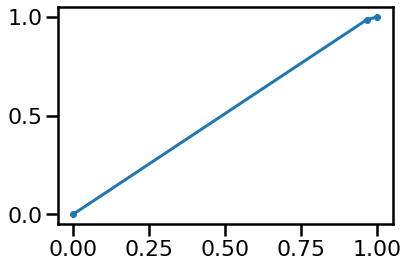

In [45]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(ytest, ypred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)